In [1]:
import arviz as az
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

from matplotlib.lines import Line2D
from matplotlib.patches import  FancyArrowPatch

In [2]:
%matplotlib inline
plt.style.use("intuitivebayes")

mpl.rcParams["figure.dpi"] = 120
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.spines.left"] = False

In [3]:
data = pd.read_csv("data/fish-market.csv")
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
data = data[data["Weight"] > 0].reset_index(drop=True)

## Linear functions review

Do you remember the following formula from high-school?

$$
y = f(x) = c + mx
$$

* Yes! This is the equation of a simple straight line.
* We'll see how this simple function is the basis of the powerful machinery in linear regression.
* It's important to review what the math means
    * There's a variable $y$
    * This variable $y$ is a function of $x$
        *  It means that $y$ will be different for each value of $x$

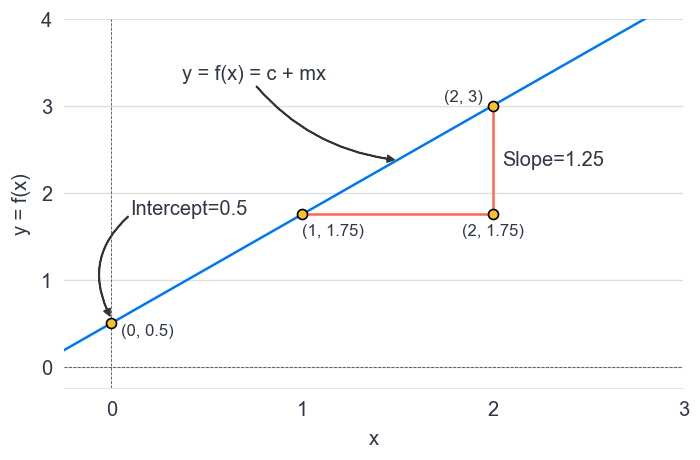

In [5]:
arrowstyle = "Simple, tail_width=0.3, head_width=4, head_length=4"
connectiontyle = "arc3, rad=0.4"
arrowstyles = {"color": "0.2", "arrowstyle": arrowstyle, "connectionstyle": connectiontyle}

fig, ax = plt.subplots(tight_layout=True)
ax.set(
    xlabel="x",
    ylabel="y = f(x)",
    xlim=(-0.25, 3),
    ylim=(-0.25, 4),
    xticks=[0, 1, 2, 3],
    yticks=[0, 1, 2, 3, 4]
)
ax.axvline(0, color="0.3", ls="--", lw=0.5)
ax.axhline(0, color="0.3", ls="--", lw=0.5)

# Plot straight line
p1 = (0, 0.5)
p2 = (1, 1.75)
slope = p2[1] - p1[1]
ax.axline(p1, p2, zorder=2)

# Plot intercept point
ax.scatter(*p1, color="C1", ec="black", zorder=3)

# Plot arrow pointing to the intercept point
ax.add_patch(FancyArrowPatch((0.1, 1.75), (0, 0.55), **arrowstyles))
ax.text(0.1, 1.75, "Intercept=0.5")
ax.text(p1[0] + 0.05, p1[1], str(p1), size=10, va="top")

# Slope
ax.plot((1, 2), (1.75, 1.75), color="C4", zorder=1)
ax.plot((2, 2), (1.75 + slope, 1.75), color="C4", zorder=1)
ax.scatter((1, 2, 2), (1.75, 1.75 + slope, 1.75), color="C1", ec="black", zorder=3)
ax.text(2.05, 1.75 + slope / 2, "Slope=1.25", va="center")
ax.text(1, 1.65, "(1, 1.75)", size=10, va="top")
ax.text(2, 1.65, "(2, 1.75)", size=10, ha="center", va="top")
ax.text(1.95, 1.8 + slope, "(2, 3)", size=10, ha="right")

# Arrow pointing to straight line
arrowstyles.update({"connectionstyle": "arc3, rad=0.2"})
ax.add_patch(FancyArrowPatch((0.75, 3.25), (1.5, 2.375), **arrowstyles))
ax.text(0.75, 3.3, "y = f(x) = c + mx", ha="center");

Interpretation of the parameters

* $c$ is known as the **Intercept**
    * The value of $y$ when $x$ is 0. 
        * In the plot, $c=0.5$
* $m$ is known as the **Slope**
    * How much $y$ changes when $x$ increases by 1.
        * In the plot, $m=1.25$
        * For example, at $x=1$, $y$ is equal to $1.75$. At $x=2$, $y$ is $1.75 + 1.25 = 3$.
        * $x$ increased by 1, and $y$ increased by $m$, which is 1.25

In [6]:
from ipywidgets import interact
import ipywidgets as ipyw

def plot_line(a, b):
    fig, ax = plt.subplots()
    ax.scatter(data["Length1"], data["Weight"], alpha=0.6)
    ax.set(xlabel="Length (centimeters)", ylabel="Weight (grams)")
    xlims = ax.get_xlim()
    y1 = a + b * xlims[0]
    y2 = a + b * xlims[1]
    ax.plot(xlims, (y1, y2), color="C1")

interact(
    plot_line,
    a=ipyw.FloatSlider(min=-200, max=1500, step=1, value=300),
    b=ipyw.FloatSlider(min=-200, max=200, step=1, value=0)
);

interactive(children=(FloatSlider(value=300.0, description='a', max=1500.0, min=-200.0, step=1.0), FloatSlider…

In [7]:
def plot_line(a, b):
    fig, ax = plt.subplots()
    ax.scatter(np.log(data["Length1"]), np.log(data["Weight"]), alpha=0.6)
    ax.set(xlabel="log(Length)", ylabel="log(Weight)")
    xlims = ax.get_xlim()
    y1 = a + b * xlims[0]
    y2 = a + b * xlims[1]
    ax.plot(xlims, (y1, y2), color="C1")

interact(
    plot_line,
    a=ipyw.FloatSlider(min=-2, max=10, step=0.1, value=3.5),
    b=ipyw.FloatSlider(min=-3.5, max=3.5, step=0.1, value=0)
);

interactive(children=(FloatSlider(value=3.5, description='a', max=10.0, min=-2.0), FloatSlider(value=0.0, desc…

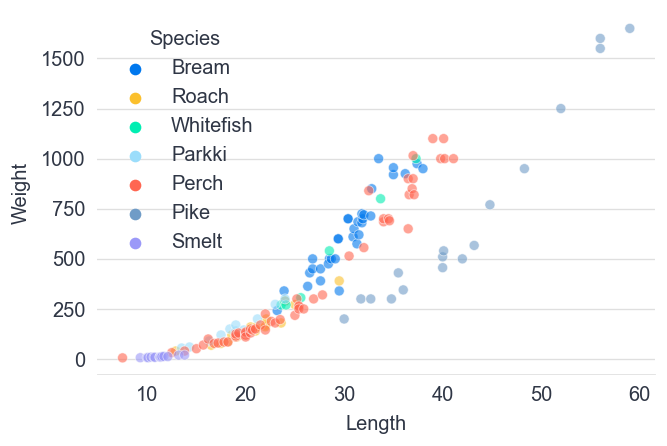

In [8]:
ax = sns.scatterplot(
    x=data["Length1"], 
    y=data["Weight"], 
    hue=data["Species"],
    alpha=0.6
)
ax.set(xlabel="Length", ylabel="Weight");

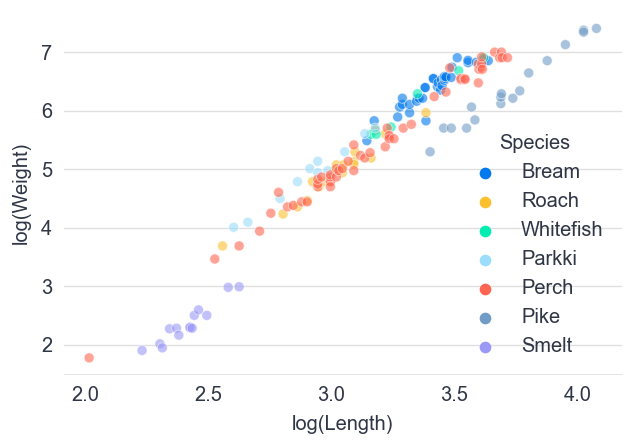

In [9]:
ax = sns.scatterplot(
    x=np.log(data["Length1"]), 
    y=np.log(data["Weight"]), 
    hue=data["Species"],
    alpha=0.6
)
ax.set(xlabel="log(Length)", ylabel="log(Weight)");

In [ ]:
length = data["Length1"].to_numpy()
weight = data["Weight"].to_numpy()
species_idx, species = pd.factorize(data["Species"])
coords = {"species": species}

with pm.Model(coords=coords) as model_3:
    b0 = pm.Normal("b0", dims="species")
    sigma = pm.HalfNormal("sigma")
    mu = b0[species_idx]
    pm.Normal(
        "weight",
        mu=mu,
        sigma=sigma,
        observed=np.log(weight)
    )

In [ ]:
with model_3:
    idata_3 = pm.sample(chains=4, random_seed=1234)

In [ ]:
intercepts = idata_3.posterior["b0"].mean(("chain", "draw"))
intercepts_draws = idata_3.posterior["b0"][:, ::10, :]

In [1]:
fig, axes = plt.subplots(2, 4, figsize=(12, 7), sharex=True, sharey=True, tight_layout=True)

handles = []
for i, (ax, species) in enumerate(zip(axes.ravel(), species_list)):
    mask = data["Species"] == species
    ax.scatter(
        np.log(data[~mask]["Length1"]), 
        np.log(data[~mask]["Weight"]), 
        alpha=0.4,
        color="0.75",
        s=20
    )
    ax.scatter(
        np.log(data[mask]["Length1"]), 
        np.log(data[mask]["Weight"]), 
        color=f"C{i}",
        label=species,
        ec="black",
        zorder=10
    )

    for intercept in intercepts_draws.sel(species=species).values.flatten():
        ax.axhline(intercept, color=f"C{i}", lw=0.05)

    intercept = intercepts.sel(species=species)
    ax.axhline(intercept, color="black", lw=1)

    handles.append(Line2D([], [], marker="o", color=f"C{i}", label=species))
    if i in [0, 4]:
        ax.set(ylabel="log(Weight)")
    
    if i in [3, 4, 5, 6]:
        ax.set(xlabel="log(Length)")

axes.ravel()[-1].remove()
fig.legend(title="Species", handles=handles, bbox_to_anchor=(0.95, 0.425));

NameError: name 'plt' is not defined

In [ ]:
length = data["Length1"].to_numpy()
weight = data["Weight"].to_numpy()
species_idx, species = pd.factorize(data["Species"])
coords = {"species": species}

with pm.Model(coords=coords) as model_4:
    b0 = pm.Normal("b0", dims="species")
    b1 = pm.Normal("b1")
    sigma = pm.HalfNormal("sigma")
    mu = b0[species_idx] + b1 * np.log(length)
    pm.Normal(
        "weight",
        mu=mu,
        sigma=sigma,
        observed=np.log(weight)
    )

In [ ]:
with model_4:
    idata_4 = pm.sample(chains=4, random_seed=1234, target_accept=0.9)

In [ ]:
az.plot_trace(idata_4, chain_prop={"ls": "-"})
plt.tight_layout()

In [ ]:
b0_draws = idata_4.posterior["b0"][:, ::10]
b1_draws = idata_4.posterior["b1"][:, ::10]

b0_mean = idata_4.posterior["b0"].mean(("chain", "draw"))
b1_mean = idata_4.posterior["b1"].mean(("chain", "draw")).item()

b0_all = b0_mean.mean().item()

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(12, 7), sharex=True, sharey=True, tight_layout=True)

x_grid = np.array((np.log(length).min() - 0.25, np.log(length).max() + 0.25))
handles = []
for i, (ax, species) in enumerate(zip(axes.ravel(), species_list)):
    mask = data["Species"] == species
    ax.scatter(
        np.log(data[~mask]["Length1"]), 
        np.log(data[~mask]["Weight"]), 
        alpha=0.4,
        color="0.75",
        s=20
    )
    ax.scatter(
        np.log(data[mask]["Length1"]), 
        np.log(data[mask]["Weight"]), 
        color=f"C{i}",
        label=species,
        ec="black",
        alpha=0.7,
        zorder=10
    )

    b0_draws_ = b0_draws.sel(species=species).to_numpy().flatten()
    b1_draws_ = b1_draws.to_numpy().flatten()
    for b0, b1 in zip(b0_draws_, b1_draws_):
        ax.plot(x_grid, b0 + b1 * x_grid, color=f"C{i}", alpha=0.1)

    b0 = b0_mean.sel(species=species).item()
    ax.plot(x_grid, b0 + b1_mean * x_grid, color="black", lw=1)
    ax.plot(x_grid, b0_all + b1_mean * x_grid, color="0.2", ls="--", lw=1)

    handles.append(Line2D([], [], marker="o", color=f"C{i}", label=species))
    if i in [0, 4]:
        ax.set(ylabel="log(weight)")
    
    if i in [3, 4, 5, 6]:
        ax.set(xlabel="log(width)")

axes.ravel()[-1].remove()
fig.legend(title="Species", handles=handles, bbox_to_anchor=(0.95, 0.425));

In [ ]:
length = data["Length1"].to_numpy()
weight = data["Weight"].to_numpy()
species_idx, species = pd.factorize(data["Species"])
coords = {"species": species}

with pm.Model(coords=coords) as model_5:
    b0 = pm.Normal("b0", dims="species")
    b1 = pm.Normal("b1", dims="species")
    sigma = pm.HalfNormal("sigma")
    mu = b0[species_idx] + b1[species_idx] * np.log(length)
    pm.Normal(
        "weight",
        mu=mu,
        sigma=sigma,
        observed=np.log(weight)
    )

In [ ]:
with model_5:
    idata_5 = pm.sample(chains=4, random_seed=1234, target_accept=0.9)

In [ ]:
az.plot_trace(idata_5, chain_prop={"ls": "-"})
plt.tight_layout()

In [ ]:
b0_draws = idata_5.posterior["b0"][:, ::10]
b1_draws = idata_5.posterior["b1"][:, ::10]

b0_mean = idata_5.posterior["b0"].mean(("chain", "draw"))
b1_mean = idata_5.posterior["b1"].mean(("chain", "draw"))

b0_all = b0_mean.mean().item()
b1_all = b1_mean.mean().item()

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(12, 7), sharex=True, sharey=True, tight_layout=True)

x_grid = np.array((np.log(length).min() - 0.25, np.log(length).max() + 0.25))
handles = []
for i, (ax, species) in enumerate(zip(axes.ravel(), species_list)):
    mask = data["Species"] == species
    ax.scatter(
        np.log(data[~mask]["Length1"]), 
        np.log(data[~mask]["Weight"]), 
        alpha=0.4,
        color="0.75",
        s=20
    )
    ax.scatter(
        np.log(data[mask]["Length1"]), 
        np.log(data[mask]["Weight"]), 
        color=f"C{i}",
        label=species,
        ec="black",
        zorder=10
    )

    b0_draws_ = b0_draws.sel(species=species).to_numpy().flatten()
    b1_draws_ = b1_draws.sel(species=species).to_numpy().flatten()
    for b0, b1 in zip(b0_draws_, b1_draws_):
        ax.plot(x_grid, b0 + b1 * x_grid, color=f"C{i}", alpha=0.1)

    b0 = b0_mean.sel(species=species).item()
    b1 = b1_mean.sel(species=species).item()
    ax.plot(x_grid, b0 + b1 * x_grid, color="black", lw=1)
    
    # Dotted line. Mean across all species.
    ax.plot(x_grid, b0_all + b1_all * x_grid, color="0.2", ls="--", lw=1)

    handles.append(Line2D([], [], marker="o", color=f"C{i}", label=species))
    if i in [0, 4]:
        ax.set(ylabel="log(weight)")
    
    if i in [3, 4, 5, 6]:
        ax.set(xlabel="log(width)")

axes.ravel()[-1].remove()
fig.legend(title="Species", handles=handles, bbox_to_anchor=(0.95, 0.425));